# SVM Classification for hive-0.9.0 Dataset

This notebook implements SVM classification on the HCBOU-balanced hive-0.9.0 dataset for software defect prediction.

In [1]:
dataset_name = "hive-0.9.0"    # ej. "activemq-5.0.0"
method_name  = "csbboost"          # ej. "hcbou", "csbboost", etc.
# ============================================================

# Generación automática de nombres de archivo (sin modificar flujo)
train_features_file = f"{dataset_name}-{method_name}-train-features-balanced-scaled.csv"
train_labels_file   = f"{dataset_name}-{method_name}-train-labels-balanced.csv"
test_features_file  = f"{dataset_name}-{method_name}-test-features-scaled.csv"
test_labels_file    = f"{dataset_name}-{method_name}-test-labels.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load HCBOU-Balanced Dataset

In [3]:
# Load training data (balanced and scaled)
train_df = pd.read_csv(train_labels_file)
if "class" in train_df.columns:
    y_train = train_df["class"]
else:
    # Fallback: tomar la primera columna si cambia el nombre
    y_train = train_df.iloc[:, 0]

X_train = pd.read_csv(train_features_file)

# Load test data (scaled)
test_df = pd.read_csv(test_labels_file)
if "RealBug" in test_df.columns:
    y_test = test_df["RealBug"]
else:
    # Fallback genérico
    y_test = test_df.iloc[:, 0]

X_test = pd.read_csv(test_features_file)

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (1131, 65)
Training labels shape: (1131,)
Test set shape: (284, 65)
Test labels shape: (284,)

Training set class distribution:
RealBug
0    566
1    565
Name: count, dtype: int64

Test set class distribution:
RealBug
0    227
1     57
Name: count, dtype: int64


## SVM Model Implementation

In [4]:
# Initialize SVM with croos-validation parameters
svm_model = SVC(kernel='rbf', C=100, gamma='scale')

print("SVM Model Parameters:")
print(f"Kernel: {svm_model.kernel}")
print(f"C (regularization): {svm_model.C}")
print(f"Gamma: {svm_model.gamma}")

SVM Model Parameters:
Kernel: rbf
C (regularization): 100
Gamma: scale


## Model Training

In [5]:
# Train the SVM model
print("Training SVM model...")
svm_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nNumber of support vectors: {svm_model.n_support_}")
print(f"Total support vectors: {sum(svm_model.n_support_)}")

Training SVM model...
Training completed!

Number of support vectors: [201 223]
Total support vectors: 424


## Model Evaluation

In [6]:
# Generate predictions
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("SVM Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

SVM Performance Metrics:
Accuracy:  0.8063
Precision: 0.5156
Recall:    0.5789
F1-Score:  0.5455


In [7]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       227
           1       0.52      0.58      0.55        57

    accuracy                           0.81       284
   macro avg       0.70      0.72      0.71       284
weighted avg       0.82      0.81      0.81       284



## Confusion Matrix

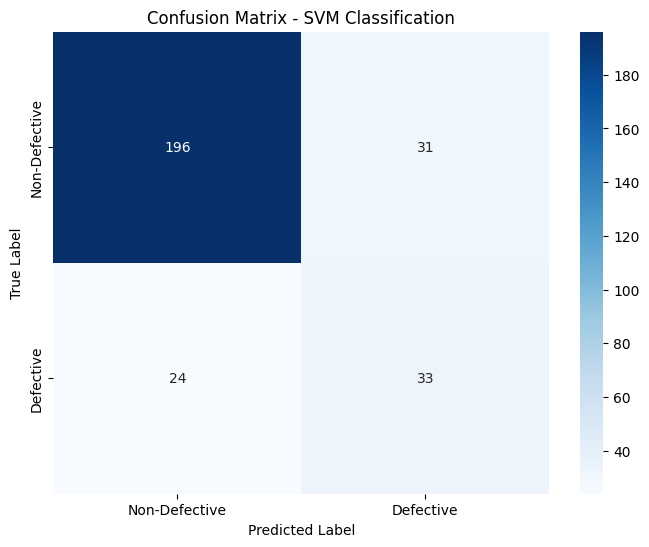


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         196          31    
Defective             24           33    


In [8]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - SVM Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Summary

In [9]:
# Summary of results
print(f"SVM Classification Summary for {dataset_name}")
print("=" * 50)
print(f"Dataset: {dataset_name} ({method_name.upper()}-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nSVM Configuration:")
print(f"- Kernel: RBF (default)")
print(f"- C: {svm_model.C}")
print(f"- Gamma: {svm_model.gamma}")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"\nSupport Vectors: {sum(svm_model.n_support_)} / {X_train.shape[0]} "
      f"({sum(svm_model.n_support_)/X_train.shape[0]*100:.1f}%)")

SVM Classification Summary for hive-0.9.0
Dataset: hive-0.9.0 (CSBBOOST-balanced)
Training samples: 1131
Test samples: 284
Features: 65

SVM Configuration:
- Kernel: RBF (default)
- C: 100
- Gamma: scale

Performance:
- Accuracy: 0.8063
- Precision: 0.5156
- Recall: 0.5789
- F1-Score: 0.5455

Support Vectors: 424 / 1131 (37.5%)
